In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from calendar import monthrange
from datetime import datetime, timedelta
import math
import glob
import datetime as dt
import traceback
import sys
from dateutil.relativedelta import relativedelta
import warnings
warnings.simplefilter("ignore")

In [2]:
def resample_d(df):
    
    df = df.set_index('datetime')
    df.index = pd.to_datetime(df.index)
    # Define a custom resampling rule from 9:15 to 10:14
    resample_rule = pd.Grouper(freq='D', base=9*60+15, label='left')

    # Resample the data according to the custom rule and calculate OHLC (Open, High, Low, Close)
    df_custom_1hour = df.groupby(resample_rule).agg({
        'open': 'first',
        'high': 'max',
        'low': 'min',
        'close': 'last',
        'volume': 'sum'
    })
    return df_custom_1hour.dropna()
def resample_5(df):
    df = df.set_index('datetime')
    df.index = pd.to_datetime(df.index)
    # Define a custom resampling rule from 9:15 to 10:14
    resample_rule = pd.Grouper(freq='5T', base=9*60+15, label='left')

    # Resample the data according to the custom rule and calculate OHLC (Open, High, Low, Close)
    df_custom_1hour = df.groupby(resample_rule).agg({
        'open': 'first',
        'high': 'max',
        'low': 'min',
        'close': 'last',
        'volume': 'sum'
    })
    return df_custom_1hour.dropna()

In [3]:
data_d = {}
data_5 = {}
folder = r"C:\Work\Multify\Data\DATA\DATA\NF_200\NIFTY200_1min"
for df in os.listdir(folder):
    path = os.path.join(folder,df)
    data_d[df[:-4]] = resample_d(pd.read_csv(path))
    data_d[df[:-4]].index = data_d[df[:-4]].index.date
    data_5[df[:-4]] = resample_5(pd.read_csv(path))

In [4]:
print([data_d.keys()])
print([data_5.keys()])

[dict_keys(['AARTIIND', 'ABCAPITAL', 'ABFRL', 'ACC', 'ADANIENT', 'ADANIGREEN', 'ADANIPORTS', 'ADANITRANS', 'AJANTPHARM', 'ALKEM', 'AMARAJABAT', 'AMBUJACEM', 'APLLTD', 'APOLLOHOSP', 'APOLLOTYRE', 'ASHOKLEY', 'ASIANPAINT', 'ASTRAL', 'ATGL', 'AUBANK', 'AUROPHARMA', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJAJHLDNG', 'BAJFINANCE', 'BALKRISIND', 'BANDHANBNK', 'BANKBARODA', 'BANKINDIA', 'BATAINDIA', 'BEL', 'BERGEPAINT', 'BHARATFORG', 'BHARTIARTL', 'BHEL', 'BIOCON', 'BOSCHLTD', 'BPCL', 'BRITANNIA', 'CANBK', 'CASTROLIND', 'CHOLAFIN', 'CIPLA', 'COALINDIA', 'COFORGE', 'COLPAL', 'CONCOR', 'COROMANDEL', 'CROMPTON', 'CUB', 'CUMMINSIND', 'DABUR', 'DALBHARAT', 'DEEPAKNTR', 'DHANI', 'DIVISLAB', 'DIXON', 'DLF', 'DMART', 'DRREDDY', 'EICHERMOT', 'EMAMILTD', 'ENDURANCE', 'ESCORTS', 'EXIDEIND', 'FEDERALBNK', 'FORTIS', 'GAIL', 'GLAND', 'GLENMARK', 'GODREJCP', 'GODREJIND', 'GODREJPROP', 'GRASIM', 'GSPL', 'GUJGASLTD', 'HAL', 'HAVELLS', 'HCLTECH', 'HDFC', 'HDFCAMC', 'HDFCBANK', 'HDFCLIFE', 'HEROMOTOCO', 'HIN

In [5]:
def calculate_sma(df, window=20):
    df['SMA_' + str(window)] = df['volume'].rolling(window=window, min_periods=1).mean()
    return df

In [6]:
for key in data_d.keys():
    data_d[key] = calculate_sma(data_d[key]) 

In [7]:
for key in data_5.keys():
    data_5[key]['%_change'] = ((data_5[key]['open'] - data_5[key]['close'].shift(4))/data_5[key]['close'].shift(4)) * 100

In [8]:
# Define the start and end dates
start_date = pd.Timestamp('2018-01-01 09:30:00')
end_date = pd.Timestamp('2022-12-14 09:30:00')

# Generate a range of datetime values at 5-minute intervals
time_range = pd.date_range(start=start_date, end=end_date, freq='D')    

In [9]:
#Filter
def stock_selection(t):
    stocks = []
    filter_df = pd.DataFrame(columns=['Symbol','Money_Money','90_%_change'])
    for i,key in enumerate(data_d.keys()):
        symbol = key
        try:
            money = (data_5[key]['volume'].rolling(window=3).sum()[t]/data_d[key]['SMA_20'].shift(1)[t.date()])*data_5[key]['%_change'][t]
            rolling_percent_change = ((data_5[key]['open'][t] - data_5[key].shift(4725)['close'][t]) / data_5[key].shift(4725)['close'][t]) * 100
            ninety = rolling_percent_change
            filter_df.loc[i] = [key,money,ninety]
        except:
            print('Stock Selection error',key,t)
    return filter_df.sort_values(by='Money_Money',ascending = not True)

In [10]:
k = pd.to_datetime('2018-1-1 9:30:00')

In [33]:
stock_selection(k).head(10)

Stock Selection error AARTIIND 2018-01-01 09:30:00
Stock Selection error ADANIGREEN 2018-01-01 09:30:00
Stock Selection error ATGL 2018-01-01 09:30:00
Stock Selection error BANDHANBNK 2018-01-01 09:30:00
Stock Selection error DALBHARAT 2018-01-01 09:30:00
Stock Selection error DHANI 2018-01-01 09:30:00
Stock Selection error GLAND 2018-01-01 09:30:00
Stock Selection error HAL 2018-01-01 09:30:00
Stock Selection error HDFCAMC 2018-01-01 09:30:00
Stock Selection error INDIAMART 2018-01-01 09:30:00
Stock Selection error IRCTC 2018-01-01 09:30:00
Stock Selection error IRFC 2018-01-01 09:30:00
Stock Selection error ISEC 2018-01-01 09:30:00
Stock Selection error NAM-INDIA 2018-01-01 09:30:00
Stock Selection error POLYCAB 2018-01-01 09:30:00
Stock Selection error SBICARD 2018-01-01 09:30:00
Stock Selection error SONACOMS 2018-01-01 09:30:00


,Symbol,Money_Money,90_%_change
83,HDFCLIFE,0.566574,NaN
194,WHIRLPOOL,0.355997,32.149743
15,ASHOKLEY,0.332728,6.499780
29,BANKINDIA,0.250711,23.607143
86,HINDCOPPER,0.245146,78.046672
191,VBL,0.231026,27.801668
119,LTIM,0.178611,46.974812
160,SAIL,0.151881,71.743119
51,CUMMINSIND,0.133427,0.737561
57,DIXON,0.115407,62.494305


In [10]:
def execute_strategy_buy(df,symbol):
    trade = {}
    position =False
    lot_size = 1
    high = 0
    low = 999999
    check_green = 0
    order = False
    exit_type = ['Stoploss','DayEnd']
    mo = None
    mc = None
    for i,row in df.iterrows():
        #Entry
        if order == False:
            high = max(high,row.high)
            #low = min(low,row.low)
        if row.close>row.open and position == False  and order == False: #green candle
            check_green +=1
            if check_green == 1:
                mo = row.open
            # if check_green > 5:
            #     check_green = 1
            #print(i,check_green)

        if check_green>=2 and check_green<=5 and position == False and order == False:
            if row.close<row.open: #red candle
                check_green = 0
                if ((abs(row.close-row.open))/(row.high-row.low))>0.2: #20%body
                    order = True
                    low = row.low
                    mc = row.close
                    if ((high-low)/high)*100 > 1.5:
                        return
                    #print(high)
        if row.close<row.open and order == False:
            return
        
        if order == True and position == False:
            if (mc - row.close)/(mc-mo) > 0.6: #momemtum kill
                #print('Yes momentum kill')
                return 
            
        if order and position == False:
            if row.high > high:
                entry_time = i
                entry_price = row.high
                position = True
        #Exit
        if row.low<low and position == True:
            exit_time = i
            exit_price = low
            trade={
            'EntryTime': entry_time,
            'ExitTime': exit_time,
            'Symbol': symbol, 
            'EntryPrice': entry_price,
            'ExitPrice': exit_price,
            'StopLoss':low,
            'ExitType':exit_type[0],
            'Quantity': 1,
            'PositionStatus':1,
            'PnL': (-entry_price+exit_price)*lot_size,
            'Return': (-entry_price+exit_price) / exit_price
            }
            return trade
            position = False
        if i.time() == dt.time(15,20) and position == True:
            exit_time = i
            exit_price = row.close
            trade={
            'EntryTime': entry_time,
            'ExitTime': exit_time,
            'Symbol': symbol, 
            'EntryPrice': entry_price,
            'ExitPrice': exit_price,
            'StopLoss':low,
            'ExitType':exit_type[1],
            'Quantity': 1,
            'PositionStatus':1,
            'PnL': (-entry_price+exit_price)*lot_size,
            'Return': (-entry_price+exit_price) / exit_price
            }
            return trade
            position = False
    return trade

In [83]:
def execute_strategy_sell(df,symbol):
    trade = {}
    position =False
    lot_size = 1
    high = 0
    low = 999999
    check_red = 0
    order = False
    exit_type = ['Stoploss','DayEnd']
    stoploss = None
    for i,row in df.iterrows():
        #Entry
        if order == False:
            low = min(low,row.low)
            
        if  row.close <= row.high-(row.high - row.low)*0.4 and position == False  and order == False: #below 40 from top
            check_red +=1
            if check_red == 1:
                mo = row.open
            #print(i,check_red)
        if check_red>=2 and check_red<=5 and position == False and order == False:
            if row.close >= row.low+(row.high - row.low)*0.4: #above 60 
                check_red = 0
                #if ((abs(row.close-row.open))/(row.high-row.low))>0.2: #20%body
                order = True
                #print('Signal',symbol,i)
                high = row.high
                stoploss = row.high
                mc = row.close
                # if abs((low-high)/low)*100 > 1.5:
                #     return
                    #print(low)
        if row.close>row.open and order == False:
            return
            
        if order == True and position == False:
            if row.close >= row.low+(row.high - row.low)*0.4:
                stoploss = max(stoploss,row.high)
                #print(symbol,stoploss)
            if (row.close-mc)/(mo-mc) > 0.6: #momemtum kill
                #print('Yes momentum kill')
                return 
    
        if order and position == False:

            if row.low < low:
                entry_time = i
                entry_price = row.low
                position = True
                #print('Entry',symbol,i)
                #print('Yes')
                if stoploss == None:
                    #print('yes1')
                    stoploss = row.high
        #Exit
        if stoploss:
            if row.high>stoploss and position == True and i != entry_time:
                exit_time = i
                exit_price = low
                trade={
                'EntryTime': entry_time,
                'ExitTime': exit_time,
                'Symbol': symbol, 
                'EntryPrice': entry_price,
                'ExitPrice': exit_price,
                'StopLoss':stoploss,
                'ExitType':exit_type[0],
                'Quantity': 1,
                'PositionStatus':-1,
                'PnL': (entry_price-exit_price)*lot_size,
                'Return': (entry_price-exit_price) / entry_price
                }
                
                return trade
                position = False
        if i.time() == dt.time(15,20) and position == True:
            exit_time = i
            exit_price = row.close
            trade={
            'EntryTime': entry_time,
            'ExitTime': exit_time,
            'Symbol': symbol, 
            'EntryPrice': entry_price,
            'ExitPrice': exit_price,
            'StopLoss':stoploss,
            'ExitType':exit_type[1],
            'Quantity': 1,
            'PositionStatus':-1,
            'PnL': (entry_price-exit_price)*lot_size,
            'Return': (entry_price-exit_price) / entry_price
            }
            
            return trade
            position = False
    return trade

In [85]:
results = []
for t in time_range:
    if t.day_of_week != 5 and t.day_of_week != 6:
        stocks = stock_selection(t)
        stocks_buy = stocks[stocks['Money_Money']>0].head(10)
        stocks_sell = stocks.sort_values(by='Money_Money',ascending=True).head(10)
        sub_results_buy = []
        sub_results_sell= []
        #break
        #print(stocks_buy,stocks_sell)
        print(t)
        # if not stocks_buy.empty:
        #     for stock in stocks_buy.Symbol:
        #         data = data_5[stock][(data_5[stock].index.year == t.year)&(data_5[stock].index.month == t.month)&(data_5[stock].index.day == t.day)]
        #         # if len(sub_results_buy)==3:
        #         #     break
        #         srb = execute_strategy_buy(data,stock)
        #         if srb:
        #             srb['Money_Money'] = stocks[stocks['Symbol']==stock]['Money_Money'].iloc[0]
        #             srb['90_%_change'] = stocks[stocks['Symbol']==stock]['90_%_change'].iloc[0]
        #             sub_results_buy.append(srb)
        if not stocks_sell.empty:
            for stock in stocks_sell.Symbol:
                data = data_5[stock][(data_5[stock].index.year == t.year)&(data_5[stock].index.month == t.month)&(data_5[stock].index.day == t.day)]
                # if len(sub_results_sell) ==3:
                #     break
                srs = execute_strategy_sell(data,stock)
                if srs:
                    srs['Money_Money'] = stocks[stocks['Symbol']==stock]['Money_Money'].iloc[0]
                    srs['90_%_change'] = stocks[stocks['Symbol']==stock]['90_%_change'].iloc[0]
                    sub_results_sell.append(srs)
        results.append([sub_results_buy,sub_results_sell])
        #break

Stock Selection error AARTIIND 2018-01-01 09:30:00
Stock Selection error ADANIGREEN 2018-01-01 09:30:00
Stock Selection error ATGL 2018-01-01 09:30:00
Stock Selection error BANDHANBNK 2018-01-01 09:30:00
Stock Selection error DALBHARAT 2018-01-01 09:30:00
Stock Selection error DHANI 2018-01-01 09:30:00
Stock Selection error GLAND 2018-01-01 09:30:00
Stock Selection error HAL 2018-01-01 09:30:00
Stock Selection error HDFCAMC 2018-01-01 09:30:00
Stock Selection error INDIAMART 2018-01-01 09:30:00
Stock Selection error IRCTC 2018-01-01 09:30:00
Stock Selection error IRFC 2018-01-01 09:30:00
Stock Selection error ISEC 2018-01-01 09:30:00
Stock Selection error NAM-INDIA 2018-01-01 09:30:00
Stock Selection error POLYCAB 2018-01-01 09:30:00
Stock Selection error SBICARD 2018-01-01 09:30:00
Stock Selection error SONACOMS 2018-01-01 09:30:00
2018-01-01 09:30:00
Stock Selection error AARTIIND 2018-01-02 09:30:00
Stock Selection error ADANIGREEN 2018-01-02 09:30:00
Stock Selection error ATGL 2018

In [86]:
f = []
for i in results:
    if i:
        f.extend(i[0])
        f.extend(i[1])

In [87]:
r = []
for w in f:
    if w:
        r.append(w)

In [88]:
pd.DataFrame(r)

,EntryTime,ExitTime,Symbol,EntryPrice,ExitPrice,StopLoss,ExitType,Quantity,PositionStatus,PnL,Return,Money_Money,90_%_change
0,2018-01-01 15:05:00,2018-01-01 15:20:00,INDUSTOWER,368.60,369.45,374.95,DayEnd,1,-1,-0.85,-0.002306,-0.157746,-2.404731
1,2018-01-01 09:25:00,2018-01-01 09:55:00,TATAELXSI,966.50,968.00,973.35,Stoploss,1,-1,-1.50,-0.001552,-0.090411,19.956629
2,2018-01-01 09:30:00,2018-01-01 09:40:00,TORNTPOWER,279.15,279.70,280.75,Stoploss,1,-1,-0.55,-0.001970,-0.038888,30.708295
3,2018-01-01 13:50:00,2018-01-01 15:20:00,HEROMOTOCO,3754.75,3753.75,3785.00,DayEnd,1,-1,1.00,0.000266,-0.033039,1.911932
4,2018-01-02 09:40:00,2018-01-02 09:45:00,EICHERMOT,291.11,291.52,292.60,Stoploss,1,-1,-0.41,-0.001408,-0.434220,-4.863813
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4645,2022-12-13 09:35:00,2022-12-13 15:20:00,ESCORTS,2211.00,2218.00,2263.80,DayEnd,1,-1,-7.00,-0.003166,-0.077870,12.391500
4646,2022-12-13 10:10:00,2022-12-13 15:20:00,BERGEPAINT,614.20,611.75,618.90,DayEnd,1,-1,2.45,0.003989,-0.077088,-8.068606
4647,2022-12-14 09:35:00,2022-12-14 12:25:00,PNB,58.55,58.90,59.75,Stoploss,1,-1,-0.35,-0.005978,-0.087335,51.269036
4648,2022-12-14 13:20:00,2022-12-14 15:20:00,ESCORTS,2188.10,2189.80,2207.35,DayEnd,1,-1,-1.70,-0.000777,-0.043276,10.417294


In [60]:
c = data_5['DIXON']

In [61]:
n = c[(c.index.year == 2022)&(c.index.month==12)&(c.index.day==8)]

In [70]:
n.head(20)

,open,high,low,close,volume,%_change
datetime,,,,,,
2022-12-08 09:15:00,4284.90,4285.05,4230.75,4254.70,7841,0.513723
2022-12-08 09:20:00,4253.80,4256.80,4225.05,4227.00,5900,-0.192398
2022-12-08 09:25:00,4228.85,4228.85,4203.50,4204.65,8107,-0.811549
2022-12-08 09:30:00,4204.65,4213.30,4201.30,4208.00,5660,-1.345612
2022-12-08 09:35:00,4208.00,4213.80,4202.00,4206.00,3715,-1.097610
2022-12-08 09:40:00,4206.00,4212.95,4202.05,4206.00,4987,-0.496806
2022-12-08 09:45:00,4206.00,4216.85,4202.10,4215.00,1727,0.032107
2022-12-08 09:50:00,4215.00,4217.90,4204.40,4210.15,2717,0.166350
2022-12-08 09:55:00,4210.15,4212.45,4209.00,4209.00,858,0.098669


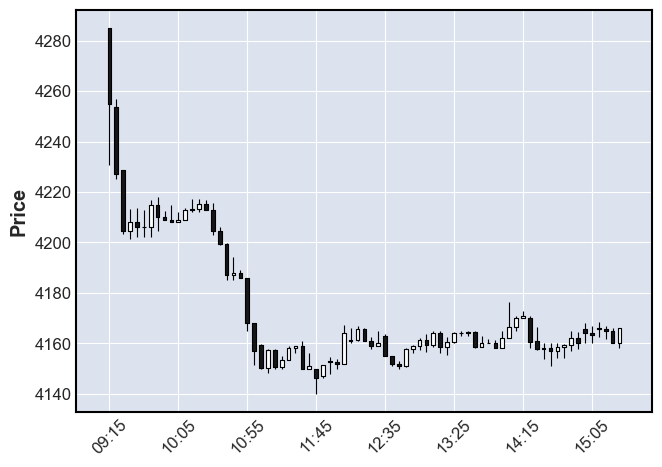

In [63]:
import mplfinance as mpf
mpf.plot(n, type='candle')

In [24]:
execute_strategy_sell(n,'INDIGO')

In [25]:
k

Timestamp('2018-01-01 09:15:00')

In [26]:
stocks_buy#.sort_values(by='Money_Money',ascending=True)

,Symbol,Money_Money,90_%_change
157,RBLBANK,0.850869,25.525292
98,INDIANB,0.247610,44.430845
189,UNIONBANK,0.104806,114.496036
109,JINDALSTEL,0.099415,28.120335
147,PFC,0.057912,26.859862
191,VBL,0.051148,30.842335
40,CANBK,0.018717,34.029057
106,IRFC,0.012999,47.577093
51,CUMMINSIND,0.007168,21.811407
39,BRITANNIA,0.001317,20.422096


In [89]:
trade_log = pd.DataFrame(r)
trade_log

,EntryTime,ExitTime,Symbol,EntryPrice,ExitPrice,StopLoss,ExitType,Quantity,PositionStatus,PnL,Return,Money_Money,90_%_change
0,2018-01-01 15:05:00,2018-01-01 15:20:00,INDUSTOWER,368.60,369.45,374.95,DayEnd,1,-1,-0.85,-0.002306,-0.157746,-2.404731
1,2018-01-01 09:25:00,2018-01-01 09:55:00,TATAELXSI,966.50,968.00,973.35,Stoploss,1,-1,-1.50,-0.001552,-0.090411,19.956629
2,2018-01-01 09:30:00,2018-01-01 09:40:00,TORNTPOWER,279.15,279.70,280.75,Stoploss,1,-1,-0.55,-0.001970,-0.038888,30.708295
3,2018-01-01 13:50:00,2018-01-01 15:20:00,HEROMOTOCO,3754.75,3753.75,3785.00,DayEnd,1,-1,1.00,0.000266,-0.033039,1.911932
4,2018-01-02 09:40:00,2018-01-02 09:45:00,EICHERMOT,291.11,291.52,292.60,Stoploss,1,-1,-0.41,-0.001408,-0.434220,-4.863813
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4645,2022-12-13 09:35:00,2022-12-13 15:20:00,ESCORTS,2211.00,2218.00,2263.80,DayEnd,1,-1,-7.00,-0.003166,-0.077870,12.391500
4646,2022-12-13 10:10:00,2022-12-13 15:20:00,BERGEPAINT,614.20,611.75,618.90,DayEnd,1,-1,2.45,0.003989,-0.077088,-8.068606
4647,2022-12-14 09:35:00,2022-12-14 12:25:00,PNB,58.55,58.90,59.75,Stoploss,1,-1,-0.35,-0.005978,-0.087335,51.269036
4648,2022-12-14 13:20:00,2022-12-14 15:20:00,ESCORTS,2188.10,2189.80,2207.35,DayEnd,1,-1,-1.70,-0.000777,-0.043276,10.417294


In [90]:
trade_log['Date'] = trade_log.EntryTime.dt.date

In [91]:
buy = trade_log[trade_log['PositionStatus']==1]
sell = trade_log[trade_log['PositionStatus']==-1]

In [171]:
g = buy.groupby(buy['Date'])
capital = 100000
portfolio = []
risk = 0.004
qty = []
capt = []
for i,group in g:
    for i,row in group.iterrows():
        quantity = round((capital * risk)/abs(row.EntryPrice - row.StopLoss))
        if len(portfolio)==0:
            portfolio.append(capital + quantity*row.PnL)
            capt.append(capital)
            qty.append(quantity)
        else:
            portfolio.append(portfolio[-1]+quantity*row.PnL)
            capt.append(capital)
            qty.append(quantity)
        #print(row.Date,capital,quantity,portfolio[-1])
    capital = portfolio[-1]


In [172]:
buy["Quantity"] = qty
buy['portfolio'] = portfolio
buy['capital'] = capt
buy['new_pnl'] = buy['Quantity']*buy['PnL']
buy

,EntryTime,ExitTime,Symbol,EntryPrice,ExitPrice,StopLoss,ExitType,Quantity,PositionStatus,PnL,Return,Money_Money,90_%_change,Date,portfolio,capital,new_pnl
0,2018-01-01 12:40:00,2018-01-01 15:20:00,LTIM,1149.90,1140.00,1136.10,DayEnd,29,1,-9.90,-0.008684,0.178611,46.974812,2018-01-01,99712.90,100000.00,-287.10
4,2018-01-02 10:15:00,2018-01-02 12:25:00,LTIM,1197.95,1172.10,1172.10,Stoploss,15,1,-25.85,-0.022054,0.201082,50.739550,2018-01-02,99325.15,99712.90,-387.75
10,2018-01-03 09:45:00,2018-01-03 15:20:00,JUBLFOOD,182.78,183.90,181.22,DayEnd,255,1,1.12,0.006090,0.810596,27.832148,2018-01-03,99610.75,99325.15,285.60
11,2018-01-03 12:30:00,2018-01-03 14:35:00,IDEA,38.22,37.55,37.55,Stoploss,593,1,-0.67,-0.017843,0.241191,32.837407,2018-01-03,99213.44,99325.15,-397.31
12,2018-01-03 09:40:00,2018-01-03 09:40:00,JSWSTEEL,271.00,269.30,269.30,Stoploss,234,1,-1.70,-0.006313,0.218980,7.286482,2018-01-03,98815.64,99325.15,-397.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5261,2022-12-09 12:15:00,2022-12-09 12:35:00,INDIAMART,4508.00,4456.30,4456.30,Stoploss,1,1,-51.70,-0.011602,0.327904,-6.233563,2022-12-09,9028.28,9157.58,-51.70
5268,2022-12-13 11:10:00,2022-12-13 15:20:00,YESBANK,22.25,24.25,21.80,DayEnd,80,1,2.00,0.082474,1.779338,24.576271,2022-12-13,9188.28,9028.28,160.00
5270,2022-12-14 09:45:00,2022-12-14 09:55:00,LTIM,4444.45,4415.05,4415.05,Stoploss,1,1,-29.40,-0.006659,0.401477,-8.075464,2022-12-14,9158.88,9188.28,-29.40
5271,2022-12-14 09:40:00,2022-12-14 14:10:00,BIOCON,273.20,271.10,271.10,Stoploss,18,1,-2.10,-0.007746,0.276428,-11.025177,2022-12-14,9121.08,9188.28,-37.80


In [92]:
g = sell.groupby(sell['Date'])
capital = 100000
portfolio = []
risk = 0.004
qty = []
capt = []
for i,group in g:
    for i,row in group.iterrows():
        quantity = round((capital * risk)/abs(row.EntryPrice - row.StopLoss))
        if len(portfolio)==0:
            portfolio.append(capital + quantity*row.PnL)
            capt.append(capital)
            qty.append(quantity)
        else:
            portfolio.append(portfolio[-1]+quantity*row.PnL)
            capt.append(capital)
            qty.append(quantity)
        #print(row.Date,capital,quantity,portfolio[-1])
    capital = portfolio[-1]


In [93]:
sell["Quantity"] = qty
sell['portfolio'] = portfolio
sell['capital'] = capt
sell['new_pnl'] = sell['Quantity']*sell['PnL']

In [94]:
sell.reset_index()

,index,EntryTime,ExitTime,Symbol,EntryPrice,ExitPrice,StopLoss,ExitType,Quantity,PositionStatus,PnL,Return,Money_Money,90_%_change,Date,portfolio,capital,new_pnl
0,0,2018-01-01 15:05:00,2018-01-01 15:20:00,INDUSTOWER,368.60,369.45,374.95,DayEnd,63,-1,-0.85,-0.002306,-0.157746,-2.404731,2018-01-01,99946.45,100000.00,-53.55
1,1,2018-01-01 09:25:00,2018-01-01 09:55:00,TATAELXSI,966.50,968.00,973.35,Stoploss,58,-1,-1.50,-0.001552,-0.090411,19.956629,2018-01-01,99859.45,100000.00,-87.00
2,2,2018-01-01 09:30:00,2018-01-01 09:40:00,TORNTPOWER,279.15,279.70,280.75,Stoploss,250,-1,-0.55,-0.001970,-0.038888,30.708295,2018-01-01,99721.95,100000.00,-137.50
3,3,2018-01-01 13:50:00,2018-01-01 15:20:00,HEROMOTOCO,3754.75,3753.75,3785.00,DayEnd,13,-1,1.00,0.000266,-0.033039,1.911932,2018-01-01,99734.95,100000.00,13.00
4,4,2018-01-02 09:40:00,2018-01-02 09:45:00,EICHERMOT,291.11,291.52,292.60,Stoploss,268,-1,-0.41,-0.001408,-0.434220,-4.863813,2018-01-02,99625.07,99734.95,-109.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4645,4645,2022-12-13 09:35:00,2022-12-13 15:20:00,ESCORTS,2211.00,2218.00,2263.80,DayEnd,2251,-1,-7.00,-0.003166,-0.077870,12.391500,2022-12-13,29715516.56,29718308.41,-15757.00
4646,4646,2022-12-13 10:10:00,2022-12-13 15:20:00,BERGEPAINT,614.20,611.75,618.90,DayEnd,25292,-1,2.45,0.003989,-0.077088,-8.068606,2022-12-13,29777481.96,29718308.41,61965.40
4647,4647,2022-12-14 09:35:00,2022-12-14 12:25:00,PNB,58.55,58.90,59.75,Stoploss,99258,-1,-0.35,-0.005978,-0.087335,51.269036,2022-12-14,29742741.66,29777481.96,-34740.30
4648,4648,2022-12-14 13:20:00,2022-12-14 15:20:00,ESCORTS,2188.10,2189.80,2207.35,DayEnd,6188,-1,-1.70,-0.000777,-0.043276,10.417294,2022-12-14,29732222.06,29777481.96,-10519.60


In [95]:
#buy.to_csv('2022_buy_without20.csv')
sell.to_csv('60%_full.csv')

In [25]:
#result_df['Date'] = result_df['EntryTime'].dt.date
daily_portfolio = sell.groupby('Date')['portfolio'].agg('last').reset_index() 

In [26]:
daily_portfolio

,Date,portfolio
0,2018-01-01,99692.95
1,2018-01-02,100447.89
2,2018-01-03,100109.76
3,2018-01-04,100144.96
4,2018-01-05,101112.81
...,...,...
1175,2022-12-08,44271944.47
1176,2022-12-09,47020256.97
1177,2022-12-12,47002457.97
1178,2022-12-13,47096046.22


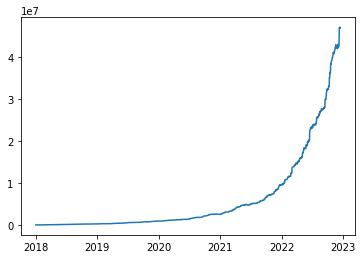

In [27]:
plt.plot(daily_portfolio['Date'],daily_portfolio['portfolio'])

In [28]:
daily_portfolio['Max Value'] = daily_portfolio['portfolio'].expanding().max()
daily_portfolio['Drawdown'] = (daily_portfolio['Max Value'] - daily_portfolio['portfolio']) / daily_portfolio['Max Value']

# Calculate Daily Returns
daily_portfolio['Daily Returns'] = daily_portfolio['portfolio'].pct_change()

# Calculate Cumulative Returns
daily_portfolio['Cumulative Returns'] = (1 + daily_portfolio['Daily Returns']).cumprod()

# Calculate Calmar Ratio
max_drawdown = daily_portfolio['Drawdown'].max()
calmar_ratio = (daily_portfolio['Cumulative Returns'].iloc[-1] - 1) / max_drawdown

# Calculate Sharpe Ratio
risk_free_rate = 0.05  # For example, assuming a 5% risk-free rate
daily_risk_free_rate = (1 + risk_free_rate) ** (1/252) - 1  # Adjusting for daily compounding
excess_daily_returns = daily_portfolio['Daily Returns'] - daily_risk_free_rate
sharpe_ratio = np.sqrt(252) * excess_daily_returns.mean() / excess_daily_returns.std()

print("Maximum Drawdown:", max_drawdown*100)
print("Calmar Ratio:", calmar_ratio)
print("Sharpe Ratio:", sharpe_ratio)

Maximum Drawdown: 4.6245709151573635
Calmar Ratio: 10155.227495132718
Sharpe Ratio: 6.413009875571947


In [96]:
new = sell

In [97]:
new = new.sort_values('EntryTime')

In [98]:
# Group by 'date_column' and get the first three entries from each group
result_df = new.groupby('Date').head(3)

# Reset the index of the result DataFrame
result_df.reset_index(drop=True, inplace=True)

In [99]:
result_df

,EntryTime,ExitTime,Symbol,EntryPrice,ExitPrice,StopLoss,ExitType,Quantity,PositionStatus,PnL,Return,Money_Money,90_%_change,Date,portfolio,capital,new_pnl
0,2018-01-01 09:25:00,2018-01-01 09:55:00,TATAELXSI,966.50,968.00,973.35,Stoploss,58,-1,-1.50,-0.001552,-0.090411,19.956629,2018-01-01,99859.45,100000.00,-87.00
1,2018-01-01 09:30:00,2018-01-01 09:40:00,TORNTPOWER,279.15,279.70,280.75,Stoploss,250,-1,-0.55,-0.001970,-0.038888,30.708295,2018-01-01,99721.95,100000.00,-137.50
2,2018-01-01 13:50:00,2018-01-01 15:20:00,HEROMOTOCO,3754.75,3753.75,3785.00,DayEnd,13,-1,1.00,0.000266,-0.033039,1.911932,2018-01-01,99734.95,100000.00,13.00
3,2018-01-02 09:30:00,2018-01-02 15:20:00,HINDCOPPER,98.80,97.90,99.75,DayEnd,420,-1,0.90,0.009109,-0.068997,67.820946,2018-01-02,100003.07,99734.95,378.00
4,2018-01-02 09:30:00,2018-01-02 15:20:00,IGL,336.00,335.50,338.85,DayEnd,140,-1,0.50,0.001488,-0.065832,14.445196,2018-01-02,100073.07,99734.95,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3159,2022-12-13 09:35:00,2022-12-13 15:20:00,LAURUSLABS,395.00,390.85,401.80,DayEnd,17481,-1,4.15,0.010506,-0.129179,-28.811301,2022-12-13,29731273.56,29718308.41,72546.15
3160,2022-12-13 09:35:00,2022-12-13 15:20:00,ESCORTS,2211.00,2218.00,2263.80,DayEnd,2251,-1,-7.00,-0.003166,-0.077870,12.391500,2022-12-13,29715516.56,29718308.41,-15757.00
3161,2022-12-14 09:35:00,2022-12-14 14:30:00,IRFC,33.15,33.30,33.50,Stoploss,340314,-1,-0.15,-0.004525,-0.029116,47.136564,2022-12-14,29681174.96,29777481.96,-51047.10
3162,2022-12-14 09:35:00,2022-12-14 12:25:00,PNB,58.55,58.90,59.75,Stoploss,99258,-1,-0.35,-0.005978,-0.087335,51.269036,2022-12-14,29742741.66,29777481.96,-34740.30


In [100]:
g = result_df.groupby(result_df['Date'])
capital = 100000
portfolio = []
risk = 0.004
qty = []
capt = []
for i,group in g:
    for i,row in group.iterrows():
        quantity = round((capital * risk)/abs(row.EntryPrice - row.StopLoss))
        if len(portfolio)==0:
            portfolio.append(capital + quantity*row.PnL)
            capt.append(capital)
            qty.append(quantity)
        else:
            portfolio.append(portfolio[-1]+quantity*row.PnL)
            capt.append(capital)
            qty.append(quantity)
        #print(row.Date,capital,quantity,portfolio[-1])
    capital = portfolio[-1]

In [101]:
result_df["Quantity"] = qty
result_df['portfolio'] = portfolio
result_df['capital'] = capt
result_df['new_pnl'] = result_df['Quantity']*result_df['PnL']
result_df

,EntryTime,ExitTime,Symbol,EntryPrice,ExitPrice,StopLoss,ExitType,Quantity,PositionStatus,PnL,Return,Money_Money,90_%_change,Date,portfolio,capital,new_pnl
0,2018-01-01 09:25:00,2018-01-01 09:55:00,TATAELXSI,966.50,968.00,973.35,Stoploss,58,-1,-1.50,-0.001552,-0.090411,19.956629,2018-01-01,99913.00,100000.00,-87.00
1,2018-01-01 09:30:00,2018-01-01 09:40:00,TORNTPOWER,279.15,279.70,280.75,Stoploss,250,-1,-0.55,-0.001970,-0.038888,30.708295,2018-01-01,99775.50,100000.00,-137.50
2,2018-01-01 13:50:00,2018-01-01 15:20:00,HEROMOTOCO,3754.75,3753.75,3785.00,DayEnd,13,-1,1.00,0.000266,-0.033039,1.911932,2018-01-01,99788.50,100000.00,13.00
3,2018-01-02 09:30:00,2018-01-02 15:20:00,HINDCOPPER,98.80,97.90,99.75,DayEnd,420,-1,0.90,0.009109,-0.068997,67.820946,2018-01-02,100166.50,99788.50,378.00
4,2018-01-02 09:30:00,2018-01-02 15:20:00,IGL,336.00,335.50,338.85,DayEnd,140,-1,0.50,0.001488,-0.065832,14.445196,2018-01-02,100236.50,99788.50,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3159,2022-12-13 09:35:00,2022-12-13 15:20:00,LAURUSLABS,395.00,390.85,401.80,DayEnd,3017,-1,4.15,0.010506,-0.129179,-28.811301,2022-12-13,5135007.86,5129326.31,12520.55
3160,2022-12-13 09:35:00,2022-12-13 15:20:00,ESCORTS,2211.00,2218.00,2263.80,DayEnd,389,-1,-7.00,-0.003166,-0.077870,12.391500,2022-12-13,5132284.86,5129326.31,-2723.00
3161,2022-12-14 09:35:00,2022-12-14 14:30:00,IRFC,33.15,33.30,33.50,Stoploss,58655,-1,-0.15,-0.004525,-0.029116,47.136564,2022-12-14,5123486.61,5132284.86,-8798.25
3162,2022-12-14 09:35:00,2022-12-14 12:25:00,PNB,58.55,58.90,59.75,Stoploss,17108,-1,-0.35,-0.005978,-0.087335,51.269036,2022-12-14,5117498.81,5132284.86,-5987.80


In [102]:
result_df.to_excel('60%_full_early_3_new.xlsx')

In [103]:
result_df.to_csv('60%_full_early_3_new.csv')